<a href="https://colab.research.google.com/github/otabek7/Logistic_Regression/blob/main/831003530_Lab5_Otabek_Mavlonov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Understanding Logistic Regression

The goal of this part is to understand how logistic regression handles binary classification problems.

We will be using Python libraries such as NumPy, Matplotlib, SciPy, and Scikit-learn. Make sure to import all the necessary libraries to run the experiments.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit  # Sigmoid function
from sklearn.linear_model import LinearRegression, LogisticRegression

We will create a simple toy dataset where the X values are sampled from a Gaussian distribution (normal distribution) with some added noise. The target y will be a binary value (0 or 1), based on whether X is greater than zero.


In [2]:
xmin, xmax = -5, 5
n_samples = 100  # Number of samples
np.random.seed(1)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)  # Binary classification target

X[X > 0] *= 4  # Scale positive values
X += 0.3 * np.random.normal(size=n_samples)  # Add noise

X = X[:, np.newaxis]  # Reshape X for sklearn compatibility

In [3]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (100, 1)
y shape: (100,)


## Visualize the dataset

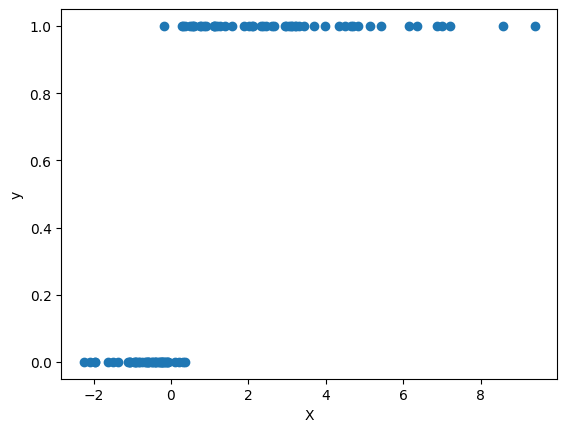

In [4]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Next, we will fit a logistic regression model to the data. Logistic regression models the probability that `y=1` given `x`.

In [5]:
logistic_regr = LogisticRegression(C=1e5)  # C=1e5 minimizes regularization to fit more closely
logistic_regr.fit(X, y)

LogisticRegression(C=100000.0)

The logistic function is of the form:
$$p = \frac{1}{1+e^{-(ax+b)}}$$
where $a$ is the coefficient and $b$ is the intercept.  
$p$ gives the probability that $y=1$ given $x$.

<font color='red'>Q1:</font> **Print the coefficient and the intercept of the trained model.**

In [6]:
print("Coefficient:", logistic_regr.coef_) # Using the .coef_ to print coefficient
print("Intercept:", logistic_regr.intercept_) # Using the .intercept_ to print intercept

Coefficient: [[7.45445923]]
Intercept: [-1.85769729]


<font color='red'>Q2:</font>**Open a code cell below to calculate the value of $x$ that gives $p=0.5$.  
Assign this value to the variable `x_threshold`.**

Now let's plot the logistic regression model along with its predictions.

In [7]:
# Get the coefficient and intercept from the trained model
coefficient = logistic_regr.coef_[0][0]
intercept = logistic_regr.intercept_[0]

# Calculate x_threshold using the formula: x = -b / a
# 'a' is the coefficient and 'b' is the intercept
x_threshold = -intercept / coefficient

print("x_threshold:", x_threshold)

x_threshold: 0.24920617765677464


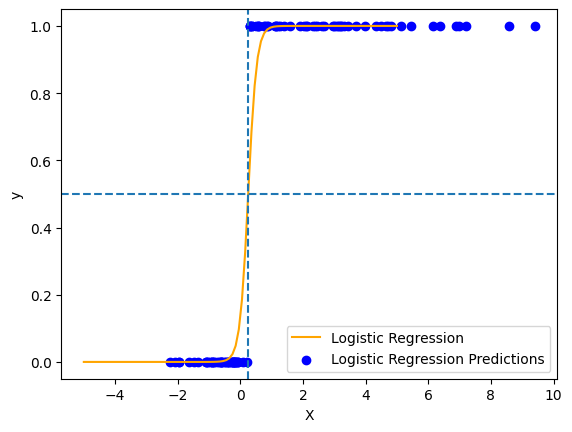

In [8]:
y_pred = logistic_regr.predict(X)

# Create a range of x values for plotting
x_plot = np.linspace(xmin, xmax, 100)

# Calculate the predicted probabilities using the logistic regression model
p_plot = 1 / (1 + np.exp(-(logistic_regr.coef_[0][0] * x_plot + logistic_regr.intercept_[0])))

# Plot the logistic function
plt.plot(x_plot, p_plot, label="Logistic Regression", c='orange')
plt.scatter(X, y_pred, label="Logistic Regression Predictions", c='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Plot dashed lines where p = 0.5, x = x_threshold
plt.axhline(0.5, linestyle='--')
plt.axvline(x_threshold, linestyle='--')
plt.show()

<font color='red'>Q3:</font>
**Open a text cell below and answer the question:  
How does logistic regression determine the decision boundary between class 0 and class 1?**

Now let's compare the predictions with the original dataset (ground truth).

Logistic regression uses the logistic function (sigmoid function) to estimate probabilities and a threshold to classify inputs based on these probabilities. The decision boundary is where the predicted probability equals the threshold.

The logistic function outputs a probability between 0 and 1 for a given input. This probability represents the likelihood of the input belonging to class 1.

Then, a threshold value (usually 0.5) is used to classify the input. If the predicted probability is greater than or equal to the threshold, the input is classified as class 1. Otherwise, it's classified as class 0.

Finally, the decision boundary is the set of points where the predicted probability equals the threshold. In other words, it's the boundary that separates the input space into regions where the model predicts class 0 and class 1.

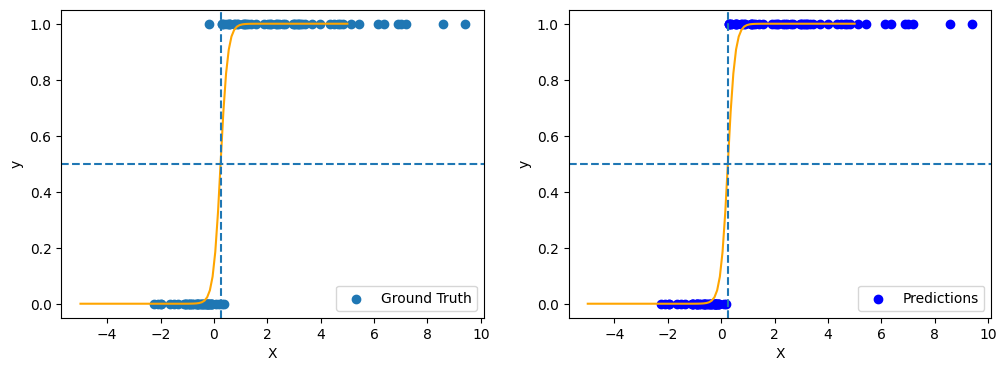

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Create a range of x values for plotting
x_plot = np.linspace(xmin, xmax, 100)

# Calculate the predicted probabilities using the logistic regression model
p_plot = 1 / (1 + np.exp(-(logistic_regr.coef_[0][0] * x_plot + logistic_regr.intercept_[0])))

# Plot the logistic function
ax[0].plot(x_plot, p_plot, c='orange')
ax[0].scatter(X, y, label="Ground Truth")
ax[0].set_xlabel("X")
ax[0].set_ylabel("y")
ax[0].axhline(0.5, linestyle='--')
ax[0].axvline(x_threshold, linestyle='--')
ax[0].legend(loc='lower right')

ax[1].plot(x_plot, p_plot, c='orange')
ax[1].scatter(X, y_pred, label="Predictions", c='blue')
ax[1].set_xlabel("X")
ax[1].set_ylabel("y")
ax[1].axhline(0.5, linestyle='--')
ax[1].axvline(x_threshold, linestyle='--')
ax[1].legend(loc='lower right')

<font color='red'>Q4:</font>
**Open a text cell below and answer the question:  
Does the logistic regression model achieve 100% accuracy for this dataset? Justify your answer.**

No, the logistic regression model does not achieve 100% accuracy for this dataset. The reason is because by visually comparing the original data points with the predictions and the logistic curve, we can see some data points are misclassified. There are some blue dots that lie on the opposite side of the 0.5 probability threshold line compared to their corresponding orange dots.

# Part 2: Comparing Logistic Regression with Linear Regression

Using the same dataset, let's create a linear regression model.  
<font color='red'>Q5:</font> **Insert a code cell below to create a linear regression model `linear_regr` and fit the model with the dataset.**

In [10]:
# Create a linear regression model
linear_regr = LinearRegression()

# Fit the model to the dataset
linear_regr.fit(X, y)

LinearRegression()

<font color='red'>Q6:</font>
**Open a text cell below and answer the question:  
What assumptions does linear regression make about the relationship between X and y?**

Linear regression makes key assumptions about the relationship between X and Y:


1.   Linearity: The relationship between X and y is assumed to be linear, meaning that a change in X results in a proportional change in y.

2. Independence: The data points are assumed to be independent of each other. This means that the value of one observation does not influence the value of another observation/data point.

3. Homoscedasticity: The variance of the errors is assumed to be constant across all levels of X. This means that the spread of the data points around the regression line shall be consistent.


<font color='red'>Q7:</font>
 **Insert a code cell below to print the coefficient and intercept of the linear regression model.**

In [11]:
print("Coefficient:", linear_regr.coef_)
print("Intercept:", linear_regr.intercept_)

Coefficient: [0.14722136]
Intercept: 0.3446328845647107


We will now plot both the logistic regression model and the linear regression model on the same graph to compare them.

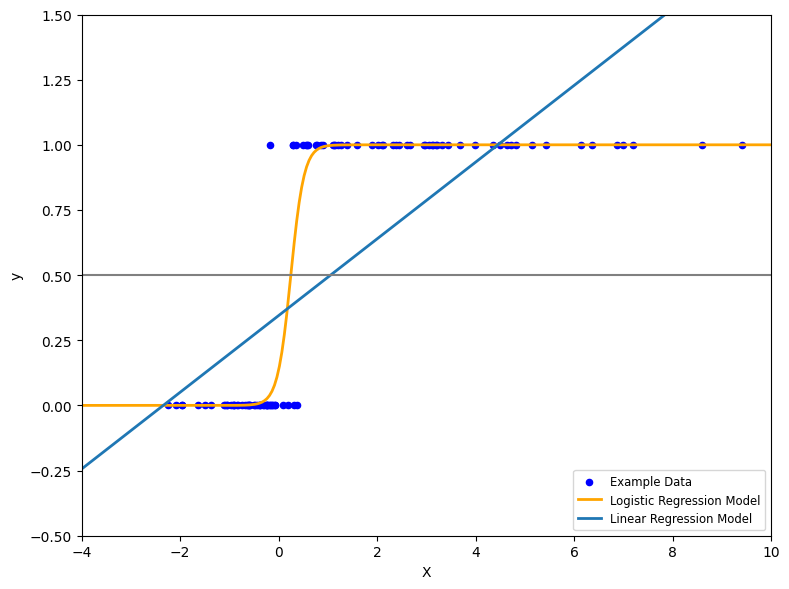

In [12]:
plt.figure(1, figsize=(8, 6))  # Set up figure
plt.scatter(X, y, label="Example Data", color="blue", s=20, marker='o')  # Scatter plot of the data

X_test = np.linspace(-5, 10, 300)  # Test range for X-axis

# Logistic regression prediction (sigmoid curve)
loss = expit(X_test * logistic_regr.coef_ + logistic_regr.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="orange", linewidth=2)

# Linear regression prediction (straight line)
plt.plot(
    X_test,
    linear_regr.coef_ * X_test + linear_regr.intercept_,
    label="Linear Regression Model",
    linewidth=2,
)

plt.axhline(0.5, color=".5")  # Horizontal line at y=0.5
plt.ylabel("y")
plt.xlabel("X")
plt.ylim(-0.5, 1.5)  # Set y-limits
plt.xlim(-4, 10)  # Set x-limits

plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.show()

<font color='red'>Q8:</font> **Open a text cell below and answer the questions:**
1. What do you observe about the shape of the logistic regression curve compared to the linear regression line?
2. Why does the output of logistic regression stay between 0 and 1, while linear regression does not?
3. If you were to classify the data into two groups based on the output of the linear regression model, what threshold would you use? How would this threshold compare to the 0.5 threshold in logistic regression?




1.   Shape: The logistic regression curve is "S-shaped" and represents probability, while the linear regression line is straight and represents a continuous relationship.

2. Output Range: Logistic regression outputs probabilities between 0 and 1 due to the logistic function, while linear regression outputs can be any value.

3. Classification Threshold: For linear regression classification, we need a threshold within the predicted values' range (not 0.5 like in logistic regression). This threshold could be the midpoint of predicted values.


# Part 3: Customer Churn Prediction (Binary Classification)

In this part of the lab, you will build a logistic regression model to predict customer churn (whether a customer will leave a service). This is a typical binary classification problem. The task will utilize a dataset with various customer features, and the goal is to predict whether a customer will churn or not (0 = no churn, 1 = churn).

In [13]:
import numpy as np
import pandas as pd
# Sklearn imports
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

Now, let's load the dataset and perform some basic exploratory data analysis to understand its structure and key characteristics.

In [14]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


!ls /content/drive/MyDrive/ECEN_250_Lab_Files/Lab_5/Telco-Customer-Churn.csv  # Please change this to the directory of your own CSV file.

# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/ECEN_250_Lab_Files/Lab_5/Telco-Customer-Churn.csv')

df.head()
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ECEN_250_Lab_Files/Lab_5/Telco-Customer-Churn.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-n

Column `TotalCharges` is of type `object`, indicating there might be some non-numeric values.  
Let's try to convert the `TotalCharges` column to numeric using `pd.to_numeric()`, and set `errors='coerce'` to turn non-numeric values into NaN.

In [15]:
# Convert the TotalCharges column to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check the datatype of this column again
print(df['TotalCharges'].dtype)

float64


<font color='red'>Q9:</font> **Insert a code block below to drop the NaNs in the DataFrame.**

In [16]:
df = df.dropna()

<font color='red'>Q10: </font>**Open a code cell below to drop the column `customerID`, since it's not relevant for predicting customer churn.**

In [17]:
df = df.drop('customerID', axis=1)

Check the values in the column `Churn`:

In [18]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

The `Churn` column contains values of `No` or `Yes`. Let's convert them to numerical values `0` or `1`.

In [19]:
# Convert 'Churn' column to numerical values: No -> 0, Yes -> 1
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

# Verify the datatype of 'Churn' column
print(df['Churn'].dtype)
df.info()

int64
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 

<ipython-input-19-395d465ae408>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})


<font color='red'>Q11: </font>**Open a text cell below and answer the question:  
Which features seem to be most relevant for predicting customer churn?**



1.   Contract: Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts (e.g., one year or two years).
2. Tenure: Customers who have been with the company for a shorter duration might be more prone to churn compared to long-term customers.
3. MonthlyCharges: Higher monthly charges could contribute to customer dissatisfaction and increase the likelihood of churn.
4. TotalCharges: Total charges accumulated over time might reflect customer loyalty or overall satisfaction, and lower values could indicate a higher risk of churn.
5. PaymentMethod: Customers using electronic check or mailed check might be more likely to churn compared to those using automatic payments (e.g., bank transfer or credit card).
6. InternetService: Fiber optic internet service, due to its higher speed and cost, might be associated with a higher churn rate compared to DSL.
7. OnlineSecurity, OnlineBackup, TechSupport: Customers without these value-added services could be more likely to churn as they might not feel as valued or supported.
8. MultipleLines: Having multiple lines could make a customer more valuable to the company and less likely to churn



Let's start with a logistic regression model using only one feature.  
<font color='red'>Q12: </font>**Choose a feature that seems to be most relevant for predicting customer churn. Insert code cells below to create a dataset (X, y) with this feature and `Churn` as the label. Split the dataset into 70% training and 30% testing.**

In [20]:
from sklearn.model_selection import train_test_split

# Create the feature dataset (X) and target variable (y)
X = df[['Contract']]  # Use double brackets to select a single column as a DataFrame
y = df['Churn']

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<font color='red'>Q13: </font>**Insert a code cell below to create a logistic regression model, train the model with the training set, and predict on the testing set.**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create the feature dataset (X) and target variable (y)
X = df[['Contract']]  # Use double brackets to select a single column as a DataFrame
y = df['Churn']

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the 'Contract' column and transform it
X['Contract'] = le.fit_transform(X['Contract'])

<ipython-input-21-fb1861eff387>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Contract'] = le.fit_transform(X['Contract'])


In [22]:
X = df[['Contract']]  # Use double brackets to select a single column as a DataFrame
y = df['Churn']

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the 'Contract' column and transform it
X['Contract'] = le.fit_transform(X['Contract'])

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
logistic_regr = LogisticRegression(C=1e5)
logistic_regr.fit(X_train, y_train)

<ipython-input-22-8d12116d6595>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Contract'] = le.fit_transform(X['Contract'])


LogisticRegression(C=100000.0)

Let's assess the accuracy:

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calculate accuracy
y_pred = logistic_regr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 73.41%
Confusion Matrix:
[[1549    0]
 [ 561    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<font color='red'>Q14: </font>**Open a text cell and answer the following question: Compared with the accuracy score, how does the confusion matrix help you understand the model's performance?**

While accuracy gives an overall correctness score, the confusion matrix provides a detailed breakdown of predictions, including true positives, true negatives, false positives, and false negatives. It lets us: see if the model is vulnerable to false positives or negatives, assess performance for each class separately, and identify areas where the model struggles.

Now we will use all numerical columns in the original DataFrame.

In [26]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


<font color='red'>Q15: </font>**Insert code cells below to do the following:**   
- Create a dataset with the above numerical features.   
- Split the dataset into 70% training and 30% testing.   
- Create a logistic regression model, train the model with the training set, and predict on the testing set.   
- Calculate the prediction accuracy.


In [27]:
# Create dataset with numerical features
X = df_numerical.drop('Churn', axis=1)  # Features (excluding 'Churn')
y = df_numerical['Churn']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train logistic regression model
logistic_regr = LogisticRegression(C=1e5)
logistic_regr.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_regr.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 78.06%


<font color='red'>Q16: </font>**Open a text cell and answer: Did the performance improve compared with the previous model using only one feature? Justify your answer.**

Using all four numerical features generally improves performance compared to using only the 'Contract' feature. This is due to the model being able to now capture more complex relationships with additional features. Additionally, some numerical features might be stronger predictors than 'Contract' alone. Thus, the model with more features achieves better overall accuracy.

Next, let's use all the features in the DataFrame.

In [28]:
# Loop through all columns with 'object' dtype
for column in df.select_dtypes(include='object').columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}' column: {unique_values}")

Unique values in 'gender' column: ['Female' 'Male']
Unique values in 'Partner' column: ['Yes' 'No']
Unique values in 'Dependents' column: ['No' 'Yes']
Unique values in 'PhoneService' column: ['No' 'Yes']
Unique values in 'MultipleLines' column: ['No phone service' 'No' 'Yes']
Unique values in 'InternetService' column: ['DSL' 'Fiber optic' 'No']
Unique values in 'OnlineSecurity' column: ['No' 'Yes' 'No internet service']
Unique values in 'OnlineBackup' column: ['Yes' 'No' 'No internet service']
Unique values in 'DeviceProtection' column: ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport' column: ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV' column: ['No' 'Yes' 'No internet service']
Unique values in 'StreamingMovies' column: ['No' 'Yes' 'No internet service']
Unique values in 'Contract' column: ['Month-to-month' 'One year' 'Two year']
Unique values in 'PaperlessBilling' column: ['Yes' 'No']
Unique values in 'PaymentMethod' column: ['Electronic check' '

The following code converts all categorical columns into numerical values.

In [29]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
df_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    if df_categorical[col].nunique() == 2:
        df_categorical[col], _ = pd.factorize(df_categorical[col])
    else:
        df_categorical = pd.get_dummies(df_categorical, columns=[col])

df_categorical = df_categorical.astype('int')
df_categorical.head()
df_categorical.info()
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   gender                                   7032 non-null   int64
 1   Partner                                  7032 non-null   int64
 2   Dependents                               7032 non-null   int64
 3   PhoneService                             7032 non-null   int64
 4   PaperlessBilling                         7032 non-null   int64
 5   MultipleLines_No                         7032 non-null   int64
 6   MultipleLines_No phone service           7032 non-null   int64
 7   MultipleLines_Yes                        7032 non-null   int64
 8   InternetService_DSL                      7032 non-null   int64
 9   InternetService_Fiber optic              7032 non-null   int64
 10  InternetService_No                       7032 non-null   int64
 11  OnlineSec

Apply a standard scaler to the features.

In [30]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'Churn']
df_std = pd.DataFrame(StandardScaler().fit_transform(df_numerical[numerical_cols].astype('float64')), columns=numerical_cols)
df_std.head()
df_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7032 non-null   float64
 1   tenure          7032 non-null   float64
 2   MonthlyCharges  7032 non-null   float64
 3   TotalCharges    7032 non-null   float64
dtypes: float64(4)
memory usage: 219.9 KB


Combine the numerical and categorical columns together.

In [31]:
df_processed = pd.concat([df_std, df_categorical], axis=1)
df_processed['Churn'] = df_numerical['Churn'].astype(int)
df_processed.head()
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   float64
 1   tenure                                   7032 non-null   float64
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   gender                                   7032 non-null   float64
 5   Partner                                  7032 non-null   float64
 6   Dependents                               7032 non-null   float64
 7   PhoneService                             7032 non-null   float64
 8   PaperlessBilling                         7032 non-null   float64
 9   MultipleLines_No                         7032 non-null   float64
 10  MultipleLines_No phone service           7032 no

<font color='red'>Q17: </font>**Insert code cells below to do the following:**   
- Create a dataset using the above DataFrame with `Churn` as the label, and all other columns as features.   
- Split the dataset into 70% training and 30% testing.   
- Create a logistic regression model, train the model with the training set, and predict on the testing set.   
- Calculate the prediction accuracy.

In [32]:
# Create dataset with all features
X = df_processed.drop('Churn', axis=1)  # Features (excluding 'Churn')
y = df_processed['Churn']  # Target variable

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train logistic regression model
logistic_regr = LogisticRegression(C=1e5)
logistic_regr.fit(X_train, y_train)

# Predict on the testing set
y_pred = logistic_regr.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

**In the "Result" section of your lab report, summarize and compare the performance of:**   
1. The model using only one feature;   
2. The model using four numerical features;   
3. The model using all features. Please share your observations and insights.

Lab 5 ends here!